# Atividade de Redes Neurais

## Felipe Gibin

## 1. Introdução


O objetivo deste notebook é realizar a classificação estelar com base em suas características espectrais, dividindo-as em três categorias: estrelas, quasares e galáxias, uma atividade fundamental para a astronomia.

Para tal, usaremos o dataset SDSS17, disponível no kaggle pelo [link](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17), somado ao framework TensorFlow e bibliotecas do Python

### 1.1 O dataset

O dataset possui diversas features, dentre elas:

1. obj_ID = Identificador do Objeto, o valor único que identifica o objeto no catálogo de imagens usado pelo CAS.

2. alpha = Ângulo de Ascensão Reta (no período J2000).

3. delta = Ângulo de Declinação (no período J2000).

4. u = Filtro Ultravioleta no sistema fotométrico.

5. g = Filtro Verde no sistema fotométrico.

6. r = Filtro Vermelho no sistema fotométrico.

7. i = Filtro Infravermelho próximo no sistema fotométrico.

8. z = Filtro Infravermelho no sistema fotométrico.

9. run_ID = Número de execução usado para identificar a varredura específica.

10. rereun_ID = Número de reanálise para especificar como a imagem foi processada.

11. cam_col = Coluna da câmera para identificar a linha de varredura dentro da execução.

12. field_ID = Número do campo para identificar cada campo observado.

13. spec_obj_ID = ID único usado para objetos espectroscópicos ópticos (isso significa que 2 observações diferentes com o mesmo spec_obj_ID devem compartilhar a mesma classe de saída).

14. class = Classe do objeto (galáxia, estrela ou quasar).

15. redshift = Valor de desvio para o vermelho (redshift) baseado no aumento do comprimento de onda.

16. plate = ID da placa, identifica cada placa no SDSS.

17. MJD = Data Julian Modificada, usada para indicar quando uma determinada peça de dados do SDSS foi coletada.

18. fiber_ID = ID da fibra, que identifica a fibra que direcionou a luz para o plano focal em cada observação.

## 2. Carregamento dos dados e config inicial

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Seeds aleatórias garantem reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

#teste, muda visual dos gráficos
plt.style.use('ggplot')

#carrega dataset
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## 3. EDA

### 3.1 Análise Inicial

In [9]:
# Linhas e colunas do dataset
print(df.shape[0])
print(df.shape[1])

100000
18


In [10]:
# Análise inicial
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


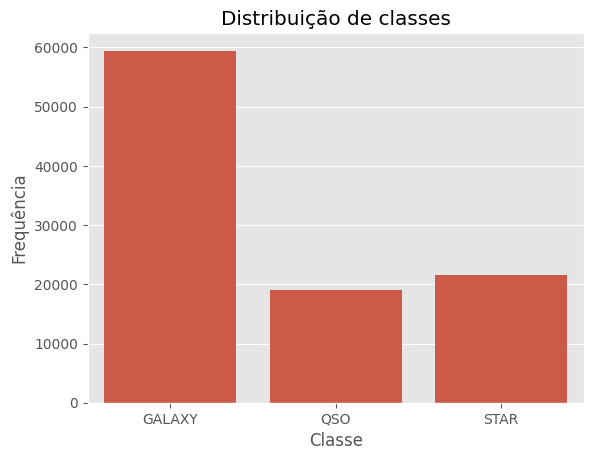

In [25]:
import seaborn as sns

#Distribuição das classes
print(df['class'].value_counts())
sns.countplot(data=df, x='class')
plt.title("Distribuição de classes")
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

### 3.2 Trata outliers

In [ ]:
# variaveis u, v , z com outliers, pela analise inicial acima

### 3.3 Trata valores faltantes

In [11]:
#Soma os valores zero e NaN por coluna
NaN_values = df.isna().sum()

Zero_values = (df == 0).sum()

# Mostrar resultado
print("Contagem NaN por coluna:")
print(NaN_values)

print("\nContagem zeros por coluna:")
print(Zero_values)

Contagem NaN por coluna:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Contagem zeros por coluna:
obj_ID           0
alpha            0
delta            0
u                0
g                0
r                0
i                0
z                0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
class            0
redshift       412
plate            0
MJD              0
fiber_ID         0
dtype: int64


Observamos que 'redshift' possui 412 valores nulos, o que corresponde à 0,41% do total de entradas. Dado que essa feature é usada para determinar a distância e velocidade de corpos celestes em relação à Terra, a presença de valores nulos constitui um problema. Apesar da proporção baixa, vamos imputar essas linhas com a mediana para essa variável.

In [15]:
#Mediana de redshift
median_redshift = df['redshift'].median()

# Substitui valores 0 por NaN
df['redshift'] = df['redshift'].replace(0, np.nan)

#Preenche os valores NaN com a mediana
df['redshift'] = df['redshift'].fillna(median_redshift)

### 3.4 Distribuição dos dados numéricos

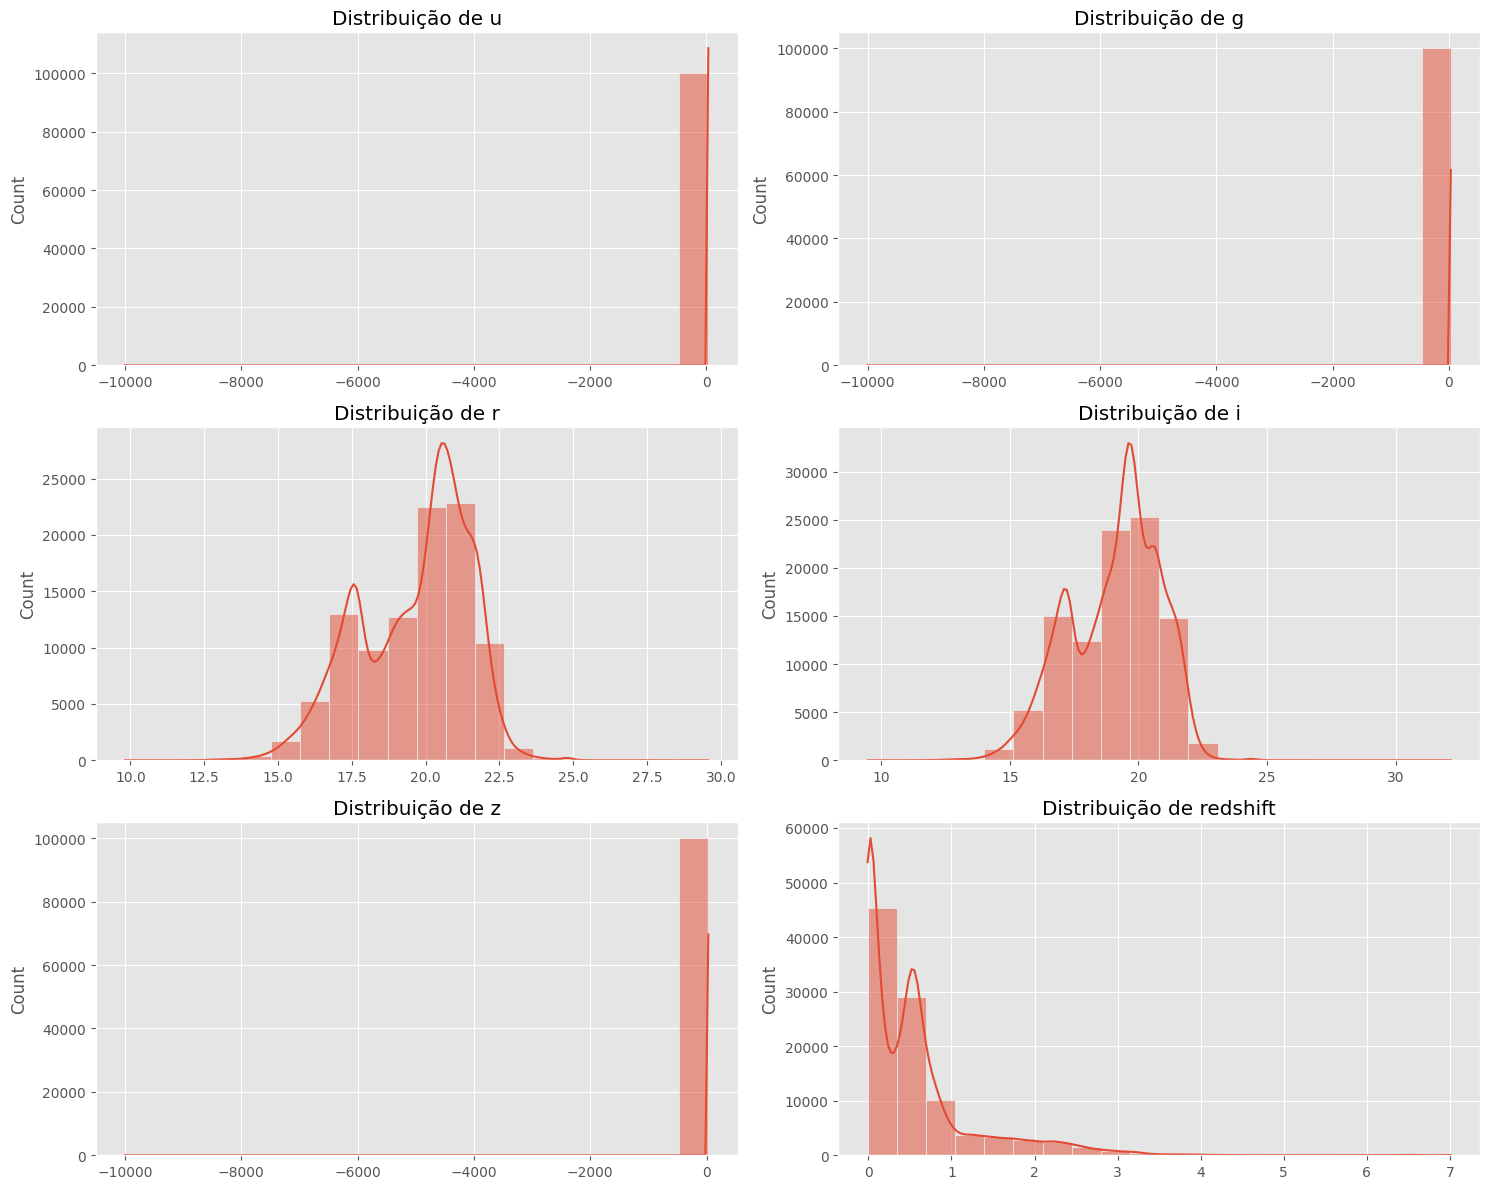

In [37]:
#Colunas dos dados numéricos
numeric_features = ['u', 'g', 'r', 'i', 'z', 'redshift']
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Observe que excluímos diversas features dessa distribuição. A seguir, vamos explicar o motivo da exclusão de todas as features afetadas:

1. Todos os IDs. Foram excluídos por se tratarem de rótulos, sem valor preditivo

2. alpha, delta. Coordenadas espaciais do objeto, não interfere na classificação. Inclusive, se mantivéssemos as coordenadas, possívelmente incluiríamos um viés espacial à classificação.

3. cam_col. Metadado de observação, não é importante

4. plate, MJD. Informações sobre a placa de espectografia e data de observação, não influenciam na classificação.



Além disso, sobre as distribuições encontradas, observamos que as variáveis `u`, `v` e `z` possuem distribuição peculiar, próximas de zero. Atribuímos esse fenômeno às médias dessas variáveis, que giram em torno de 20 e, pela escala do eixo x, parecem ser nulas.